In [166]:
# Enter your code here. Read input from STDIN. Print output to STDOUT
import sys
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm 

from sklearn import svm

import matplotlib.pyplot as plt

In [1]:
import pandas as pd

In [25]:
N = 60#int(input())
#train = np.empty(N)
#train_lab = np.chararray(N)
#for i in range(N):
    #train_lab[i], train[i] = input().strip().split()
train_df = pd.read_csv("input.txt", header=None, sep=" ", names = ["month","passengers"])

In [150]:
test = [1563178,1312558,1312558,1388316,1325942,1312550,587396,1293945,1061128,590392,1092215,1446327]

In [26]:
train_df.head()

,month,passengers
0,MonthNum_1,1226800
1,MonthNum_2,926891
2,MonthNum_3,782725
3,MonthNum_4,1023038
4,MonthNum_5,1126293


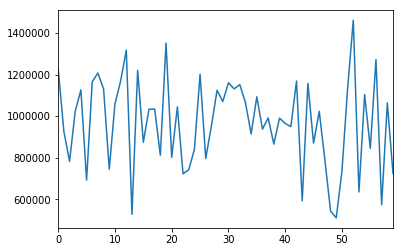

In [50]:
train_df.passengers.plot()

In [158]:
rm = train_df.passengers.rolling(window=12).mean()

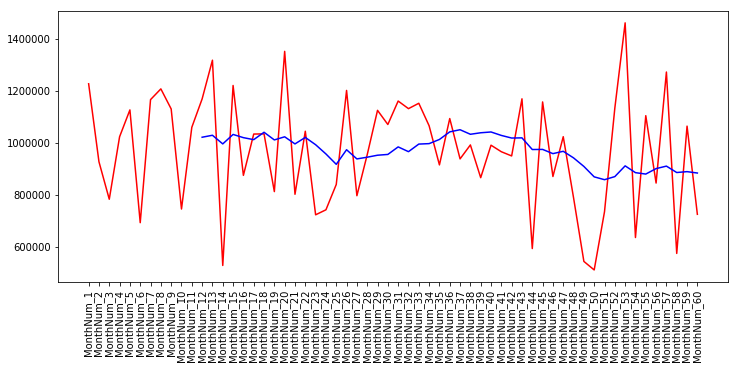

In [164]:
plt.figure(figsize=[12,5])
plt.plot(train_df.month,train_df.passengers,"r",
        train_df.month,rm,"b")
plt.xticks(rotation='vertical')
pass

In [29]:
train = np.array(train_df.passengers)

In [30]:
train

array([1226800,  926891,  782725, 1023038, 1126293,  692565, 1165880,
       1207156, 1129954,  745100, 1059346, 1168555, 1317458,  528045,
       1220238,  874557, 1033389, 1034165,  812094, 1351419,  801822,
       1044266,  722871,  742100,  839471, 1201199,  796265,  953887,
       1124602, 1070181, 1160366, 1131150, 1151813, 1065316,  914800,
       1093034,  937898,  991612,  865649,  990565,  965414,  949248,
       1168905,  593112, 1156922,  870095, 1023262,  788327,  543605,
        510786,  734714, 1133025, 1461091,  635481, 1104107,  844960,
       1271967,  574319, 1063900,  724737])

In [128]:
X0 = range(1,len(train)+1)
X = sm.add_constant(X0) 

In [129]:
X.shape

(60, 2)

In [130]:
model = sm.OLS(train,X)

In [131]:
res = model.fit()

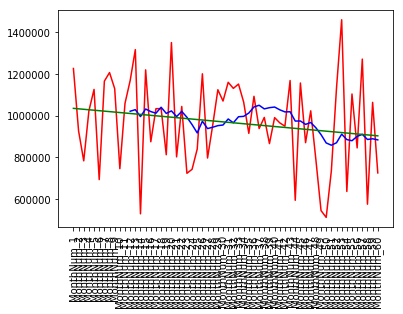

In [162]:
plt.plot(train_df.month,train_df.passengers,"r",
        train_df.month,rm,"b",
        res.predict(),'g')
plt.xticks(rotation='vertical')
pass

In [121]:
res.predict()[-1]

3.892857142857144

In [169]:
clf = svm.SVR(kernel="rbf",C=1000,gamma=0.1)

In [196]:
range(1,N+1)

range(1, 61)

In [197]:
train.shape

(60,)

In [205]:
np.array(range(1,N+1)).shape[0]

60

In [213]:
X_train0 = np.array(range(1,N+1))
X_train=X_train.reshape(X_train0.shape[0],1)

In [216]:
clf.fit(X_train,train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [217]:
X_test0 = np.array(range(N+1,N+13))
X_test = X_test0.reshape(X_test0.shape[0],1)
X_test

array([[61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72]])

In [219]:
clfpredict = clf.predict(X_test)

In [31]:
T = 12

def armaforcast(data, P=2, D=1, Q=1):
    model = ARIMA(data, order=(P,D,Q))
    model_fit = model.fit(disp=False)
    yhat = model_fit.forecast()[0]
    return yhat

In [145]:

def olsforcast(data):
    X = range(1,len(data)+1)
    X = sm.add_constant(X)
    model = sm.OLS(data,X)
    model_fit = model.fit(disp=False)
    yhat = model_fit.predict()[-1]
    return yhat

In [156]:
seendata1 = [x for x in train]
seendata2 = [x for x in train]

predicted1 = list()
predicted2 = list()

for i in range(T):
    yhat1 = armaforcast(seendata1, P=2, D=1,Q=1)
    yhat2 = olsforcast(seendata2)
    predicted1.append(yhat1)
    predicted2.append(yhat2)
    print(yhat, yhat2)
    seendata1.append(yhat1)
    seendata2.append(yhat2)

[879998.53418715] 903001.3404371594
[879998.53418715] 900905.9244806431
[879998.53418715] 898811.5814457653
[879998.53418715] 896718.277271519
[879998.53418715] 894625.9794935095
[879998.53418715] 892534.6571457005
[879998.53418715] 890444.2806696007
[879998.53418715] 888354.8218302318
[879998.53418715] 886266.2536382811
[879998.53418715] 884178.550277879
[879998.53418715] 882091.6870395521
[879998.53418715] 880005.6402578931


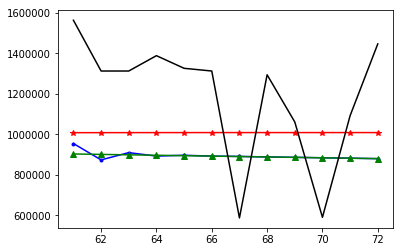

In [233]:
plt.plot(X_test, predicted1, 'b.-')
plt.plot(X_test, predicted2, 'g^-')
plt.plot(X_test, clfpredict,'r*-')
plt.plot(X_test, test, 'k')